In [43]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [44]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training data 

In [45]:
train_images  = np.array(train_images)
train_try     = train_images
m_train, a, b = train_images.shape 
n_train       = a*b
train_images  = train_images.reshape(60000,n_train) # flattening the data
Y_train  = np.array(train_labels)
X_train  = train_images.T / 255. 
print('train_images.shape: '+str(X_train.shape)+' train_labels: '+str(Y_train.shape))
print('n_train: '+str(n_train))

m = m_train

train_images.shape: (784, 60000) train_labels: (60000,)
n_train: 784


In [46]:
X_test = np.array(test_images)
X_test = X_test.reshape(10000,n_train)
X_test = X_test.T / 255
Y_test  = np.array(test_labels)
print('test_images.shape: '+str(test_images.shape)+' test_labels: '+str(test_labels.shape))

test_images.shape: (10000, 28, 28) test_labels: (10000,)


In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [49]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [50]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[5 5 9 ... 2 9 7] [9 0 0 ... 3 0 5]
0.05645
Iteration:  10
[8 0 3 ... 3 4 7] [9 0 0 ... 3 0 5]
0.37335
Iteration:  20
[8 0 3 ... 3 4 7] [9 0 0 ... 3 0 5]
0.46068333333333333
Iteration:  30
[8 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.51515
Iteration:  40
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.5511166666666667
Iteration:  50
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.57785
Iteration:  60
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.5985333333333334
Iteration:  70
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6160666666666667
Iteration:  80
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6293
Iteration:  90
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6406333333333334
Iteration:  100
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6496833333333333
Iteration:  110
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6567833333333334
Iteration:  120
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6630166666666667
Iteration:  130
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6688166666666666
Iteration:  140
[9 0 3 ... 3 6 7] [9 0 0 ... 3 0 5]
0.6716333333333333
I

In [51]:
######### Uspestnost TEST DATA #########
########################################


Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_test)
dev_predictions = get_predictions(A2)
get_accuracy(dev_predictions, test_labels)

[9 2 1 ... 8 1 7] [9 2 1 ... 8 1 5]


0.7725

guess Sandal
true Sandal
[5]


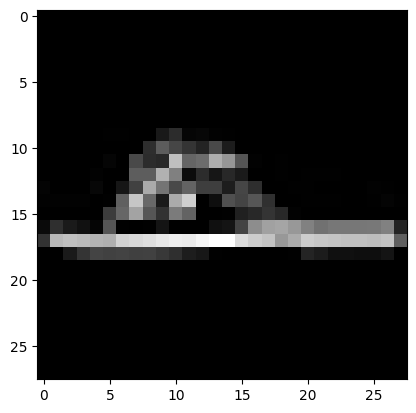

In [52]:

i = 1947

current_image = X_train[:,i,None]

_, _, _, A2 = forward_prop(W1, b1, W2, b2, X_train[:,i,None])
predictions = get_predictions(A2)
L = np.argmin(predictions)
Z = get_predictions(A2)
true = Y_train[i]
print('guess ' + class_names[Z[0]])
print('true ' + class_names[true])
print(Z)
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()